# Cria um gif para a convolução gráfica de dois sinais. 
## Adaptado de 

https://stackoverflow.com/questions/70761535/convolution-integral-export-as-animation-in-jupyter

MovieWriter ffmpeg unavailable; using Pillow instead.


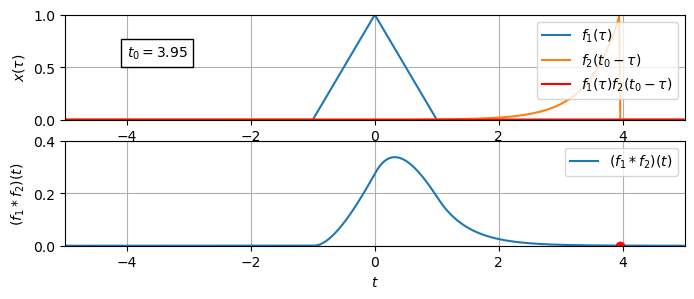

In [11]:
import scipy.integrate
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

def showConvolution(t0,f1, f2):
    
    # Calculate the overall convolution result using Simpson integration
    convolution = np.zeros(len(t))
    for n, t_ in enumerate(t):
        prod = lambda tau: f1(tau) * f2(t_-tau)
        convolution[n] = scipy.integrate.simps(prod(t), t)

    # Create the shifted and flipped function
    f_shift = lambda t: f2(t0-t)
    prod = lambda tau: f1(tau) * f2(t0-tau)

    # Plot the curves
    axes[0].clear() # il
    axes[1].clear()
    
    axes[0].set_xlim(-5, 5)
    axes[0].set_ylim(0, 1.0)
    axes[0].plot(t, f1(t), label=r'$f_1(\tau)$')
    axes[0].plot(t, f_shift(t), label=r'$f_2(t_0-\tau)$')
    axes[0].plot(t, prod(t), 'r-', label=r'$f_1(\tau)f_2(t_0-\tau)$')
    axes[0].grid(True)
    axes[0].set_xlabel(r'$\tau$')
    axes[0].set_ylabel(r'$x(\tau)$') # il
    axes[0].legend(fontsize=10, loc='upper right') # il
    axes[0].text(-4, 0.6, '$t_0=%.2f$' % t0, bbox=dict(fc='white')) # il

    # plot the convolution curve
    axes[1].set_xlim(-5, 5)
    axes[1].set_ylim(0, 0.4)
    axes[1].plot(t, convolution, label='$(f_1*f_2)(t)$')

    # recalculate the value of the convolution integral at the current time-shift t0
    current_value = scipy.integrate.simps(prod(t), t)
    axes[1].plot(t0, current_value, 'ro')  # plot the point
    axes[1].grid(True); axes[1].set_xlabel('$t$'); axes[1].set_ylabel('$(f_1*f_2)(t)$') # il
    axes[1].legend(fontsize=10) # il

Fs = 50  # our sampling frequency for the plotting
T = 5    # the time range we are interested in
t = np.arange(-T, T, 1/Fs)  # the time samples
f1 = lambda t: np.maximum(0, 1-abs(t))
f2 = lambda t: (t>0) * np.exp(-2*t)

t0 = np.arange(-4.0,4.0, 0.05)

fig = plt.figure(figsize=(8,3))
axes= fig.subplots(2, 1)
anim = animation.FuncAnimation(fig, showConvolution, frames=t0, fargs=(f1,f2),interval=80)

anim.save('animation.gif', fps=15) # fps = frames per second
plt.show()